In [28]:
import cupy as cp
import numpy as np
import h5py
import utils.dirutils as dd
import os
from os.path import join, expanduser
from scipy.special import genlaguerre
import matplotlib.pyplot as plt
%matplotlib widget

In [29]:
cd ~/Data/tmp/

/home/quojinhao/Data/tmp


In [32]:
cd ~/Data/results/archive

/home/quojinhao/Data/results/archive


In [34]:
ls *_L1_10um_1e-6.h5

1000000_L1_10um_1e-6.h5*  400000_L1_10um_1e-6.h5*  800000_L1_10um_1e-6.h5*
100000_L1_10um_1e-6.h5*   500000_L1_10um_1e-6.h5*  900000_L1_10um_1e-6.h5*
200000_L1_10um_1e-6.h5*   600000_L1_10um_1e-6.h5*
300000_L1_10um_1e-6.h5*   700000_L1_10um_1e-6.h5*


In [35]:
#%%
path = "1000000_L1_10um_1e-6.h5"
data = dd.retrieve(path)

module = sys.modules[__name__]
for name, value in data.items():
    setattr(module, name, value)
if 'LGdata' in data: # The light is stored as variable named 'LGdata'
    LG = LGdata


cut = 60

In [38]:
x = np.linspace(-Lx,Lx,Nx)
y = np.linspace(-Ly,Ly,Ny)
z = np.linspace(-Lz,Lz,Nz)
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]
hbar = 1.054571800139113e-34 
m = 1.411000000000000e-25
unit = np.sqrt(hbar/m/Wz)
[X,Y,Z] = np.meshgrid(x,y,z)
Epot = ( (Wx**2*X**2 + Wy**2*Y**2 + Wz**2*Z**2 )
                / (2*Wz**2) )
psiGmu = (15*Ggg / ( 16*np.pi*np.sqrt(2) )  )**(2/5)
TF_amp = np.array((psiGmu-Epot)/Ggg)
np.clip(TF_amp, 0, np.inf,out=TF_amp)
TF_pbb = np.sqrt(TF_amp)
total = np.sum(np.abs(TF_pbb)**2*dx*dy*dz)
n_TF_pbb = TF_pbb/np.sqrt(total,dtype=np.complex128)

In [39]:
# np.nonzero(n_TF_pbb[60,:,60]!=0)
(x[85] - x[35])/2*unit/1e-6

10.097978294271806

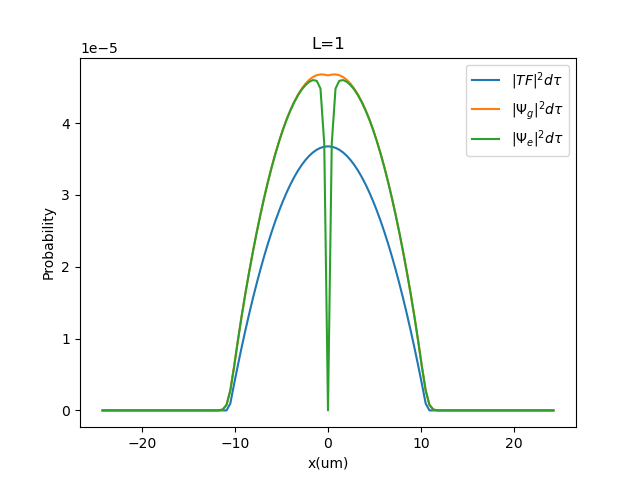

In [54]:
plt.figure()
plt.plot(x*unit/1e-6, np.abs(n_TF_pbb[cut,:,cut])**2*dx*dy*dz)
plt.plot(x*unit/1e-6, np.abs(psiG[cut,:,cut])**2*dx*dy*dz)
plt.plot(x*unit/1e-6, np.abs(psiE[cut,:,cut])**2*dx*dy*dz)
plt.title("L=1")
plt.xlabel("x(um)")
plt.ylabel("Probability")
plt.legend([r"$|TF|^2d\tau$",r"$|\Psi_g|^2d\tau$",r"$|\Psi_e|^2d\tau$"])

In [58]:
np.sum( (np.abs(n_TF_pbb)*unit**(-3/2))**2*dx*dy*dz*unit**3)

1.0000000000000004

In [ ]:
plt.close()